<a href="https://colab.research.google.com/github/BhanuSrihridai/British-Airways/blob/Development/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


- **`num_passengers`** = number of passengers travelling
- **`sales_channel`** = sales channel booking was made on
- **`trip_type`** = trip Type (Round Trip, One Way, Circle Trip)
- **`purchase_lead`** = number of days between travel date and booking date
- **`length_of_stay`** = number of days spent at destination
- **`flight_hour`** = hour of flight departure
- **`flight_day`** = day of week of flight departure
- **`route`** = origin -> destination flight route
- **`booking_origin`** = country from where booking was made
- **`wants_extra_baggage`** = if the customer wanted extra baggage in the booking
- **`wants_preferred_seat`** = if the customer wanted a preferred seat in the booking
- **`wants_in_flight_meals`** = if the customer wanted in-flight meals in the booking
- **`flight_duration`** = total duration of flight (in hours)
- **`booking_complete`** = flag indicating if the customer completed the booking

# **Glimpse of the data**

In [2]:
data=pd.read_csv("customer_booking.csv",encoding="ISO-8859-1")
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
data.shape

(50000, 14)

In [5]:
data.head().style.bar(cmap='hsv',height=80,width=90)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:4165: RuntimeWarning: invalid value encountered in long_scalars
  end = (x - left) / (right - left)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.520000,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.520000,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.520000,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.520000,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.520000,0


In [6]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [7]:
data.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [8]:
cat_cols=data.select_dtypes(include='object').columns
cat_cols

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [9]:
cntns_cols=data.select_dtypes(include=['int64','float64']).columns
cntns_cols

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')

In [10]:
for colum in cat_cols:
  unique_types=data[colum].value_counts()
  print(f"\nIndividual Counts of {colum}:\n",unique_types)


Individual Counts of sales_channel:
 Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

Individual Counts of trip_type:
 RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

Individual Counts of flight_day:
 Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

Individual Counts of route:
 AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

Individual Counts of booking_origin:
 Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_o

In [80]:
len(data.route.unique())

799

In [81]:
len(data.booking_origin.unique())

104

In [11]:
data.num_passengers.value_counts()

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64

In [12]:
data.wants_extra_baggage.value_counts()

1    33439
0    16561
Name: wants_extra_baggage, dtype: int64

In [13]:
data.wants_in_flight_meals.value_counts()


0    28643
1    21357
Name: wants_in_flight_meals, dtype: int64

In [14]:
data.wants_preferred_seat.value_counts()

0    35152
1    14848
Name: wants_preferred_seat, dtype: int64

In [15]:
data.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [16]:
data.duplicated().sum()

719

In [17]:
data[data.duplicated()].head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
196,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
316,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
384,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
456,1,Internet,RoundTrip,30,85,15,Fri,AKLKUL,Malaysia,1,0,0,8.83,1
513,3,Internet,RoundTrip,109,20,4,Tue,AKLKUL,Singapore,1,0,1,8.83,0


In [18]:
data.drop_duplicates(inplace=True)
data.shape

(49281, 14)

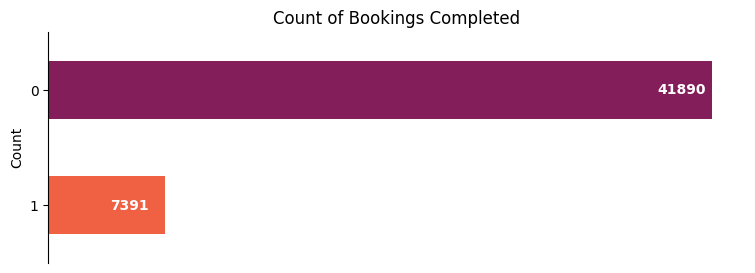

In [19]:
plt.figure(figsize=(9,3))

axes=sns.countplot(data=data,y='booking_complete',width=0.5,saturation=1,palette='rocket')
plt.title('Count of Bookings Completed')

plt.ylabel('Count')

axes.bar_label(axes.containers[0],color='white',padding=-40,fontweight='bold')                    # Setting the barlables, so that the count can be seen on the bars
axes.spines[['right','top','bottom']].set_visible(False)                                          # Removing the chart junk like boarders
axes.xaxis.set_visible(False)

**Data is *imbalanced!***

# **Data Cleaning & EDA**

In [20]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [21]:
cat_cols=list(cat_cols)
cat_cols

['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

In [22]:
cntns_cols=list(cntns_cols)
cntns_cols

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'booking_complete']

In [23]:
cntns_cols[-5:-2]

['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

In [24]:
cat_cols.insert(0,'num_passengers')
cat_cols.extend(cntns_cols[-5:-2])
cntns_cols.remove('num_passengers')
cntns_cols.remove('wants_extra_baggage')
cntns_cols.remove('wants_preferred_seat')
cntns_cols.remove('wants_in_flight_meals')

cat_cols

['num_passengers',
 'sales_channel',
 'trip_type',
 'flight_day',
 'route',
 'booking_origin',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals']

In [25]:
cntns_cols

['purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_duration',
 'booking_complete']

## **No. of Passengers**

In [26]:
data.num_passengers.value_counts()

1    30879
2    12669
3     2882
4     1767
5      544
6      281
7      107
8       88
9       64
Name: num_passengers, dtype: int64

In [27]:
# data['num_passenges']=data['num_passengers'].map({1:'One',2:"Two",3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine'})
data['num_passengers'] = data['num_passengers'].astype(str)

In [28]:
data.num_passengers.dtype

dtype('O')

Text(0, 0.5, 'No. of passengers')

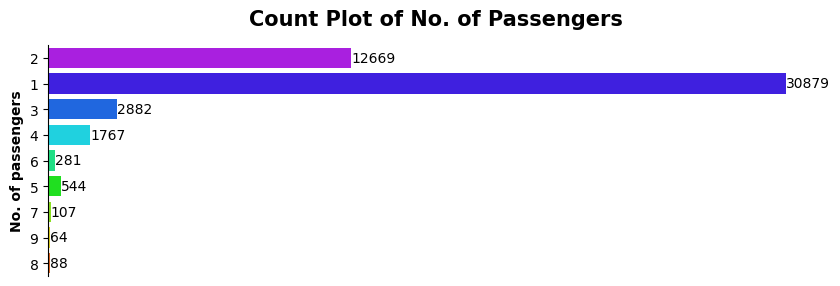

In [29]:
plt.figure(figsize=(10,3))
plot=sns.countplot(data=data,y='num_passengers',palette='gist_rainbow_r')
title="Count Plot of No. of Passengers"
plot.set_title(f"{title}",fontsize=15,fontweight='bold',y=1.05)
plot.bar_label(plot.containers[0])
plot.spines[['right','top','bottom']].set_visible(False)                                # Removing the chart junk
plot.xaxis.set_visible(False)
plt.ylabel('No. of passengers',fontweight='bold',fontsize=10)

Text(0.5, 0, 'No. of passengers')

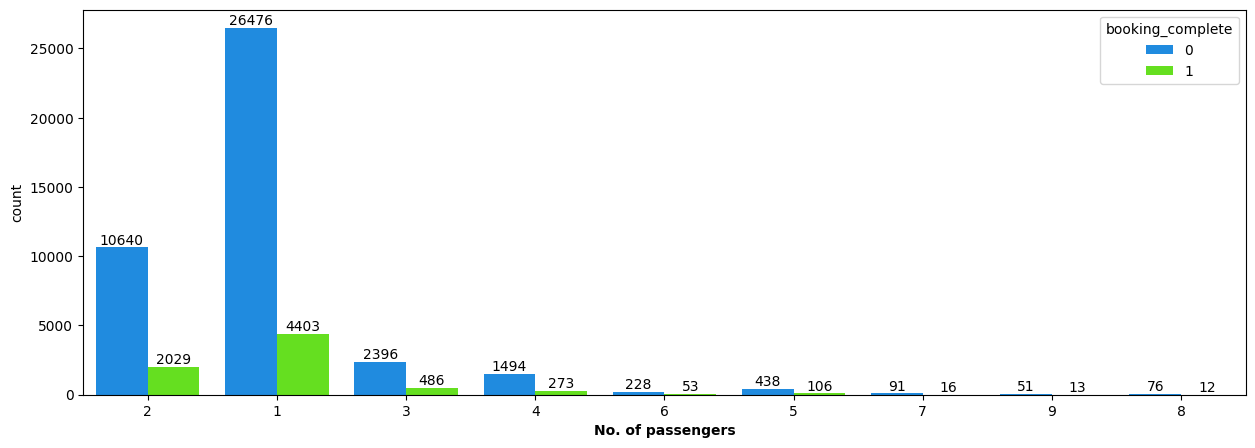

In [30]:
plt.figure(figsize=(15,5))
fig=sns.countplot(data=data,x='num_passengers',hue='booking_complete',palette='gist_rainbow_r')

for label in fig.containers:
  fig.bar_label(label)
plt.xlabel('No. of passengers',fontweight='bold')

In [31]:
passengers=pd.pivot_table(data=data,values='booking_complete',index='num_passengers').sort_values(by='booking_complete')
passengers['booking_complete']=passengers['booking_complete']*100
passengers.style.bar(cmap='inferno',height=70,props="width:40em;")

,booking_complete
num_passengers,
8,13.636364
1,14.258881
7,14.953271
4,15.449915
2,16.015471
3,16.863289
6,18.861210
5,19.485294
9,20.312500


In [32]:
passengers.index

Index(['8', '1', '7', '4', '2', '3', '6', '5', '9'], dtype='object', name='num_passengers')

Text(0, 0.5, '')

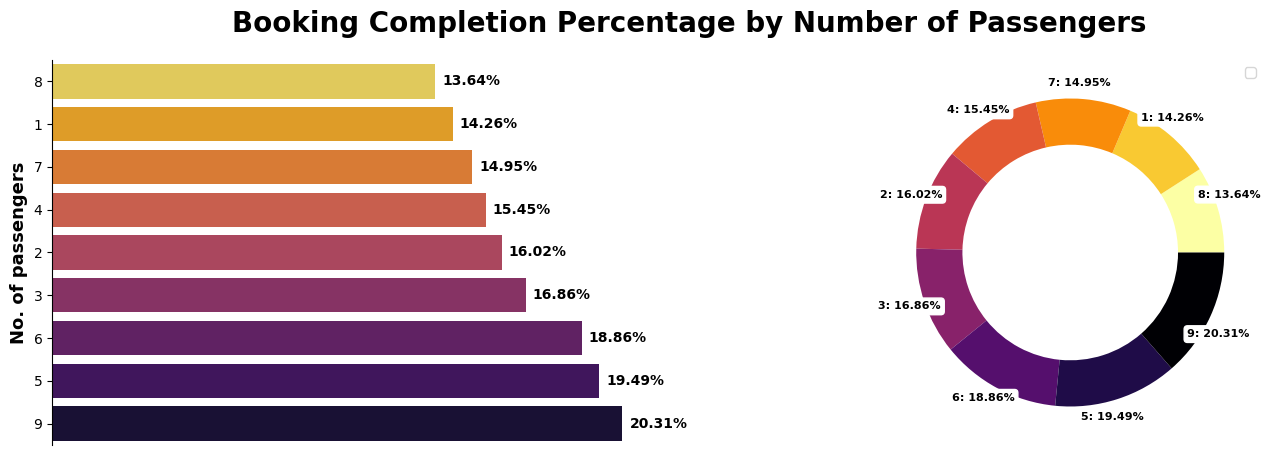

In [121]:
fig,axes=plt.subplots(1,2,figsize=(17,5))
plt.suptitle('Booking Completion Percentage by Number of Passengers',fontweight='bold',fontsize=20)

# Bar chart
axs=sns.barplot(data=passengers,y=passengers.index,x=passengers['booking_complete'],ax=axes[0],palette='inferno_r')
axs.bar_label(axs.containers[0],fmt='%.2f%%',fontweight='bold',padding=5)       # Setting bar labels with percentage of conversion
axes[0].spines[['right','top','bottom',]].set_visible(False)              # Removing the chart junk
axes[0].xaxis.set_visible(False)                                                # Hiding the x-axis
axs.set_ylabel("No. of passengers",fontweight='bold',fontsize=13)

# Pie chart
passengers.plot(kind='pie',subplots=True,ax=axes[1],cmap="inferno_r",labels=None,wedgeprops=dict(width=0.3))
# Extract values for plotting
values = passengers['booking_complete'].values
categories = passengers.index
# Manually add labels to the periphery
for i, (category, value) in enumerate(zip(categories, values)):
    angle = (360 * sum(values[:i])) / sum(values)+20
    x = 1.1 * np.cos(np.radians(angle))
    y = 1.1 * np.sin(np.radians(angle))

    plt.text(x, y, f"{category}: {value:.2f}%", ha='center', va='center', fontsize=8, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'),fontweight='bold')


# passengers['booking_complete'].plot.pie(autopct='%1.2f%%', startangle=90, legend=False,cmap='inferno_r',wedgeprops=dict(width=0.3))

plt.ylabel("")                                                                  # Removing the ylabel on pie chart

# Setting the legend location
# plt.legend(loc='upper right',bbox_to_anchor=(1.7,0.9),title='Percentage')

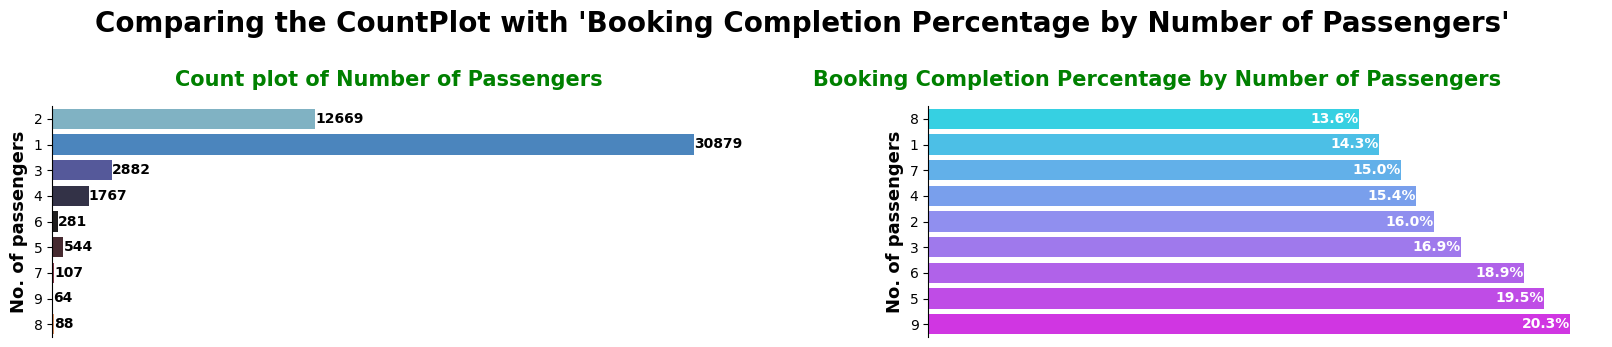

In [94]:
fig,axes=plt.subplots(1,2,figsize=(20,3))
sup_title="Comparing the CountPlot with 'Booking Completion Percentage by Number of Passengers'"
plt.suptitle(f"{sup_title}",fontweight='bold',fontsize=20,y=1.2)
fig.subplots_adjust(wspace=0.3)

# Bar Plot
bar_Plot=sns.barplot(data=passengers,y=passengers.index,x=passengers['booking_complete'],ax=axes[1],palette='cool')
bar_Plot.bar_label(bar_Plot.containers[0],fmt='%.1f%%',padding=-35,color='white',fontweight='bold')             # Setting bar labels with percentage of conversion
bar_Plot.set_title("Booking Completion Percentage by Number of Passengers",fontsize=15,fontweight='bold',x=0.34,y=1.05,color='green')      # Setting the title for subplot
bar_Plot.set_ylabel("No. of passengers",fontweight='bold',fontsize=13)                                                        # Setting the ylabel
axes[1].spines[['right','top','bottom']].set_visible(False)                                                     # Removing the chart junk
axes[1].xaxis.set_visible(False)                                                                                # Hiding the x-axis

# Count Plot
cnt_Plot=sns.countplot(data=data,y='num_passengers',palette='icefire',ax=axes[0])
cnt_Plot.bar_label(cnt_Plot.containers[0],fontweight='bold')                                                    # Setting bar labels with count
cnt_Plot.set_title("Count plot of Number of Passengers",fontsize=15,fontweight='bold',y=1.05,color='green')                      # Setting the title for subplot
cnt_Plot.set_ylabel("No. of passengers",fontweight='bold',fontsize=13)                                                        # Setting the ylabel
axes[0].spines[['right','top','bottom']].set_visible(False)                                                     # Removing the chart junk
axes[0].xaxis.set_visible(False)

In [70]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [71]:
from logging import exception

# data = a DataFrame
# cat_cols = list of categorical column names in the DataFrame 'data'
# cont_cols = list of continuous column names in the DataFrame 'data'

class Plotting:

  def __init__(this):

    this._data=data
    this._cat_cols=cat_cols
    this._target='booking_complete'
    this._col_names={'num_passengers':'No. of passengers', 'sales_channel':'Sales channel', 'trip_type':'Trip type', 'purchase_lead':'Purchase lead',
       'length_of_stay':'Length of stay', 'flight_hour':'Flight hours', 'flight_day':'Flight day', 'route':'Route',
       'booking_origin':'Booking origin', 'wants_extra_baggage':'Wants extra baggage', 'wants_preferred_seat':'Wants preferred seat',
       'wants_in_flight_meals':'Wants in flight meals', 'flight_duration':'Flight duration'}

    this._palette=['crest','cubehelix','flare','afmhot','gist_earth','gist_heat','gist_rainbow','CMRmap','cool','inferno',
                    'viridis','rocket','magma','mako','icefire','seismic_r','crest','icefire','Set2','Set3','hsv']

    this._colours=['Accent','Accent_r','BrBG','PRGn','PRGn_r','PiYG','PiYG_r','PuBuGn','rainbow','rocket','viridis','CMRmap',
                  'PuBuGn_r','PuOr','PuOr_r','RdBu','RdBu_r','RdGy','RdGy_r', 'RdPu','RdPu_r','magma','mako','flare','icefire',
                  'RdYlBu','RdYlBu_r','RdYlGn','RdYlGn_r','Spectral','Accent','Dark2','Paired','Pastel1','Pastel2','Set1','Set2','Set3']

  def categorical_uni_variation(this):

    from numpy import random

    for x in this._cat_cols:

      num=random.randint(len(this._palette))

      plt.figure(figsize=(10,5))
      fig=sns.countplot(data=this._data,y=x,hue=this._target,palette=this._palette[num],saturation=1)
      for label in fig.containers:                                                                                # setting barlabels
        fig.bar_label(label)
      plt.ylabel(this._col_names[x],fontsize=12,labelpad=20,fontweight='bold')
      plt.ylabel(x,fontsize=12,labelpad=20,fontweight='bold')

      fig.spines[['right','top','bottom']].set_visible(False)                                                     # Removing the chart junk
      fig.xaxis.set_visible(False)                                                                                # Hiding the x-axis
      # print(this._palette[num])

  def categorical_Bi_variate_heatmap(this):

    from numpy import random

    try:

      for x in this._cat_cols:

        num=random.randint(len(this._colours))

        table=pd.pivot_table(data=this._data,values=this._target,index=x)
        table[this._target]=table[this._target]*100

        plt.figure(figsize=(8,4))
        sns.heatmap(data=table,annot=True,cmap=this._colours[num],cbar_kws={'label':"Booking Completion Percentage"}).figure.axes[-1].yaxis.label.set_size(15)
        plt.title(f"Heatmap showing Rate of Booking Completion in {this._col_names[x]} column",fontsize=15,fontweight='bold',pad=25)
        plt.xlabel("Booking Completion Percentage",fontsize=12,fontweight='bold',color='green')
        plt.ylabel(this._col_names[x],fontsize=12,labelpad=20,fontweight='bold',color='green')
        plt.xticks([]) # Removes x-ticks

    except:
      pass


  def categorical_Bi_variate_target(this):

    from numpy import random

    try:

      for x in  cat_cols:
        num1=random.randint(len(this._palette))
        num2=random.randint(len(this._colours))
        seperate=[0.03 for j in range(len(this._data[x].unique()))]                                     # A list of numerical values to be used for exploding the pie chart

        table=pd.pivot_table(data=this._data,values=this._target,index=x).sort_values(by=this._target)
        table[this._target]=table[this._target]*100

        fig,axes=plt.subplots(1,2,figsize=(16,5))
        sup_title=f"Booking completion percentage in {this._col_names[x]} column"
        plt.suptitle(sup_title,fontweight='bold',fontsize=20)
        fig.subplots_adjust(wspace=0.3)

        # Bar chart
        fig_Bar=sns.barplot(data=table,y=table.index,x=table[this._target],ax=axes[0])
        fig_Bar.bar_label(axs.containers[0],fmt='%.2f%%',fontweight='bold',padding=0)                  # Setting bar labels with percentage of conversion
        axes[0].spines[['right','top','bottom']].set_visible(False)                                    # Removing the chart junk
        axes[0].xaxis.set_visible(False)                                                               # Hiding the x-axis
        fig_Bar.set_ylabel(f"{this._col_names[x]}",fontweight='bold',fontsize=13)

        # Pie chart
        table.plot(kind='pie',subplots=True,ax=axes[1],cmap=this._colours[num2],explode=seperate)
        plt.ylabel("")

        # table.plot(kind='barh',ax=axes[0],legend=None,cmap=this._palette[num1])
        # table.plot(kind='pie',subplots=True,ax=axes[1],cmap=this._colours[num2],explode=seperate)

        # Setting the legend location
        plt.legend(loc='upper right',bbox_to_anchor=(1.7,0.9),title='Percentage')

        # print(this._palette[num1],this._colours[num2])

    except:
      pass

  def categorical_Bi_variate_comparision(this):

    from numpy import random

    try:

      for category in cat_cols:

        num=random.randint(len(this._palette))
        table=pd.pivot_table(data=this._data,values=this._target,index=category).sort_values(by=this._target)
        table[this._target]=table[this._target]*100

        fig,axes=plt.subplots(1,2,figsize=(20,7))
        plt.suptitle(f"Comparing the Count Plot & Percentage of Conversion in various categories of {this._col_names[category]}",fontweight='bold',fontsize=20,y=1.03)
        fig.subplots_adjust(wspace=0.5) #hspace=0.125,                                                                            # Adjusting space between plots in subplot

        # Bar Plot
        bar_Plot=sns.barplot(data=table,y=table.index,x=table[this._target],ax=axes[1],palette='cool')
        bar_Plot.bar_label(bar_Plot.containers[0],fmt='%.1f%%',padding=-35,color='white',fontweight='bold')                       # Setting bar labels with percentage of conversion
        bar_Plot.set_title(f"Percentage of Conversion in {this._col_names[category]} column",fontsize=15,fontweight='bold')       # Setting the title for subplot
        bar_Plot.set_ylabel(f"{this._col_names[category]}",fontweight='bold',fontsize=13)                                         # Setting the ylabel
        axes[1].spines[['right','top','bottom']].set_visible(False)                                                               # Removing the chart junk
        axes[1].xaxis.set_visible(False)                                                                                          # Hiding the x-axis

        # Count Plot
        cnt_Plot=sns.countplot(data=this._data,y=category,ax=axes[0],palette=this._palette[num])
        cnt_Plot.bar_label(cnt_Plot.containers[0],fontweight='bold')                                                              # Setting bar labels with count
        cnt_Plot.set_title(f"Count Plot of {this._col_names[category]} column",fontsize=15,fontweight='bold')                     # Setting the title for subplot
        cnt_Plot.set_ylabel(f"{this._col_names[category]}",fontweight='bold',fontsize=13)                                         # Setting the ylabel
        axes[0].spines[['right','top','bottom']].set_visible(False)                                                               # Removing the chart junk
        axes[0].xaxis.set_visible(False)                                                                                          # Hiding the x-axis

        # sns.countplot(data=this._data,y=x,ax=axes[0]).set_title(f"Count Plot of {this._col_names[cate]} column",fontsize=15,fontweight='bold')
        # table.plot(kind='barh',ax=axes[1],legend=None,cmap='Spectral').set_title(f"Percentage of Conversion in {this._col_names[cate]} column",fontsize=15,fontweight='bold')
        # plt.xlabel("Percentage")

    except:
       pass

  def categorical_multi_variate_target(this):

      from itertools import combinations
      from numpy import random

      try:

        two_cat_combis=list(combinations(cat_cols,2))

        for x in two_cat_combis:

          num=random.randint(len(this._palette))

          table=this._data.pivot_table(index=x[0],columns=x[1],values=this._target)
          table=table.apply(lambda x : x*100)

          plt.figure(figsize=(15,8))
          fig=sns.heatmap(data=table,annot=True,cmap=this._palette[num],cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)

          title_string=f"Heatmap showing Rate of Conversion in the combination of {this._col_names[x[0]]} & {this._col_names[x[1]]}"
          plt.title(title_string,fontsize=20,fontweight='bold',pad=25)

          plt.xlabel(this._col_names[x[1]],fontsize=15,fontweight='bold',labelpad=5)
          plt.xticks(fontsize=13,rotation=45,ha='right')[1:-1]
          plt.ylabel(this._col_names[x[0]],fontsize=15,fontweight='bold',labelpad=20)
          plt.yticks(fontsize=13)
          plt.show()
      except:
        pass


In [72]:
plots=Plotting()

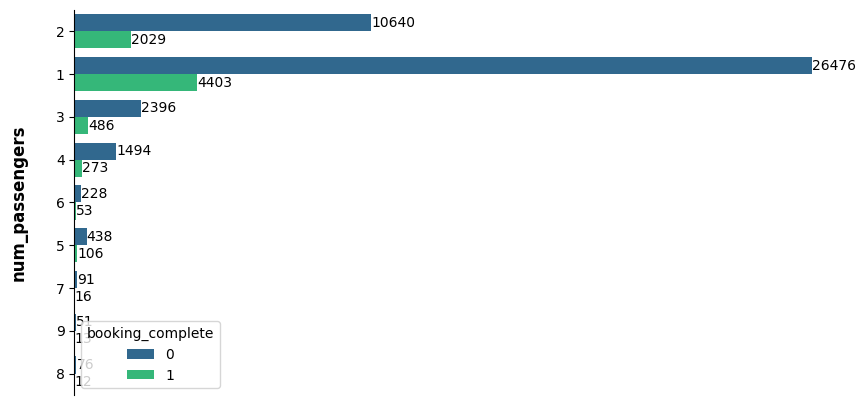

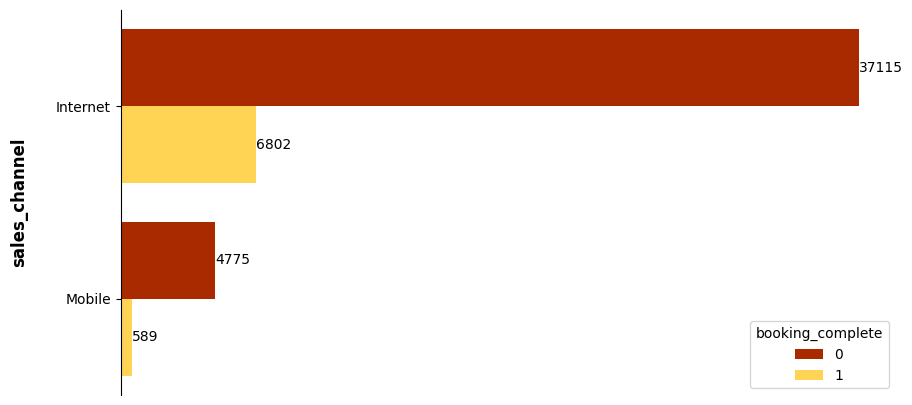

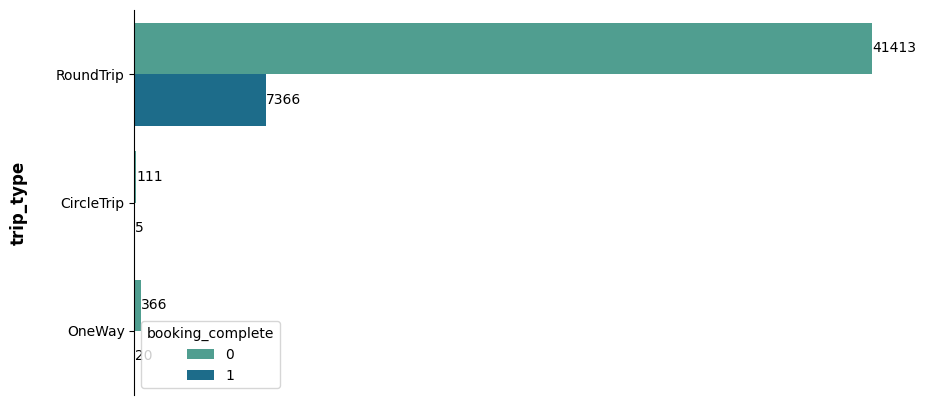

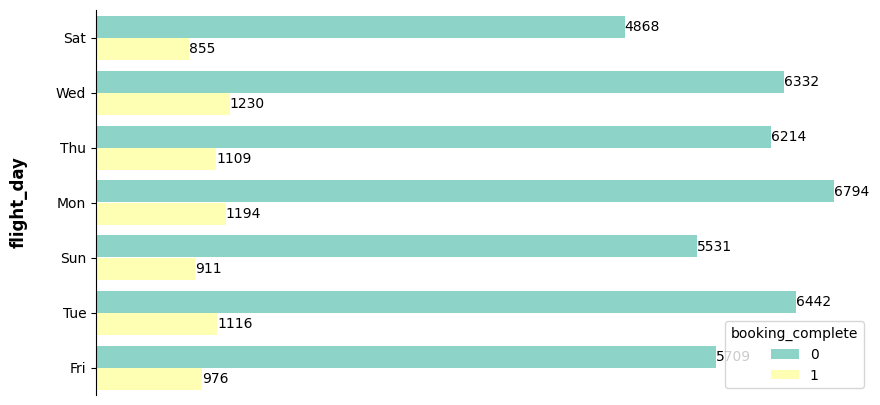

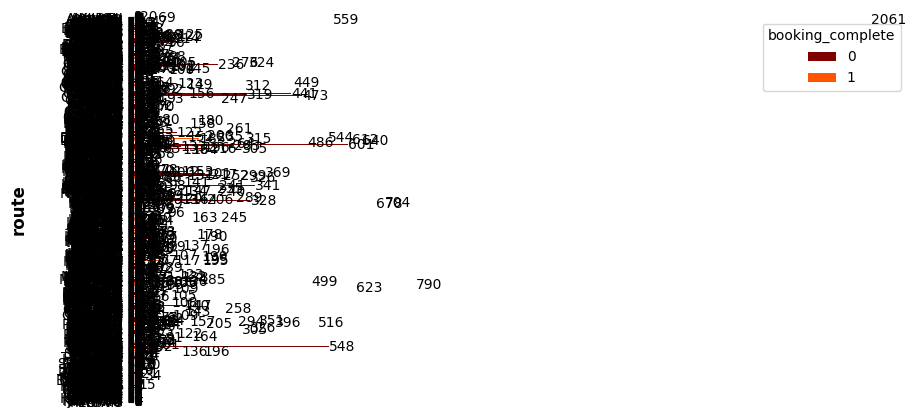

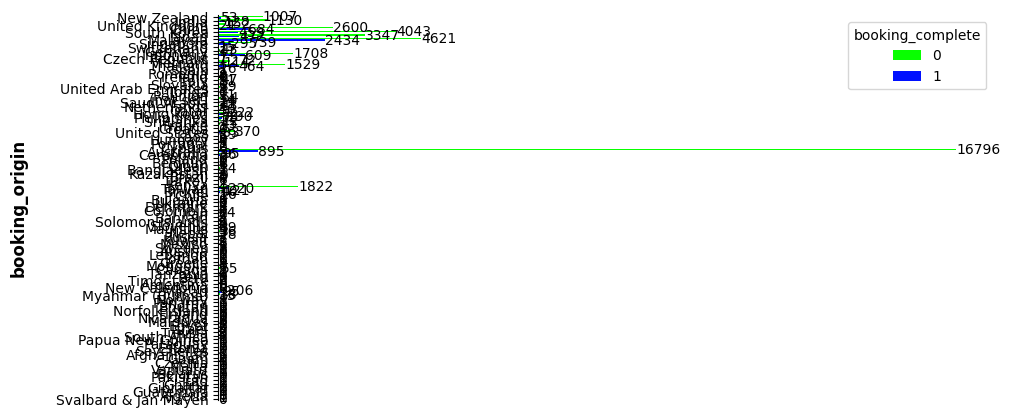

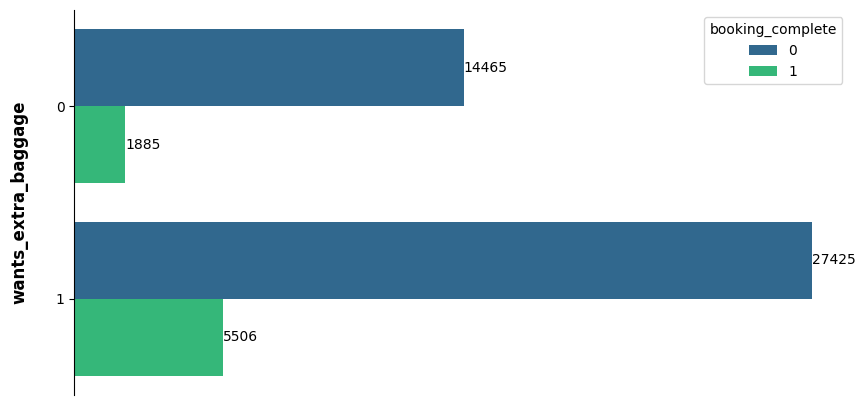

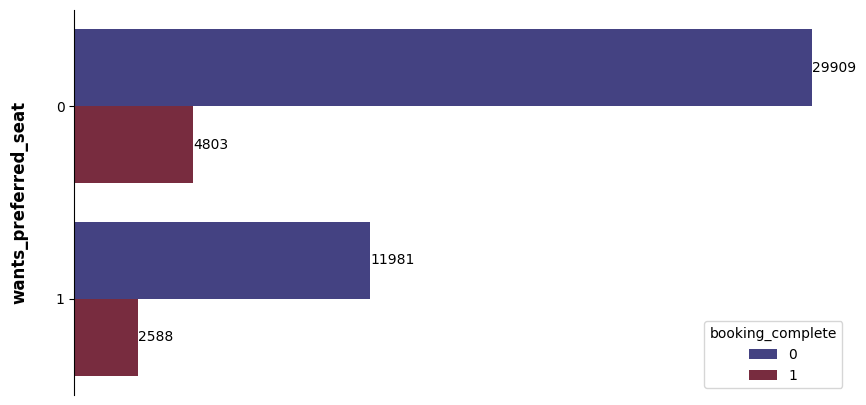

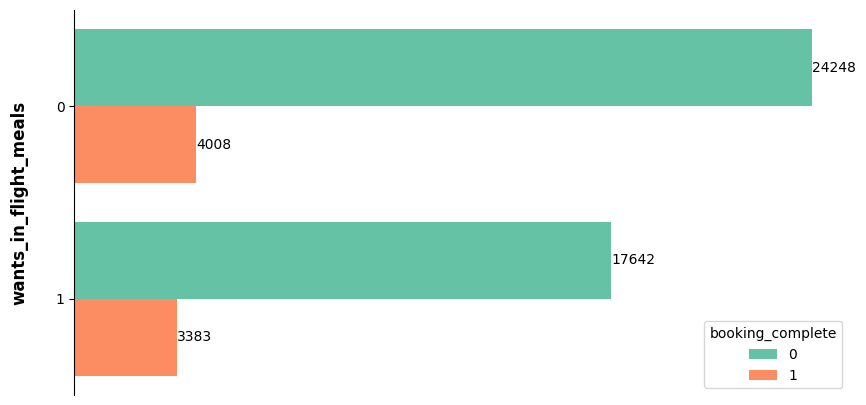

In [73]:
plots.categorical_uni_variation()

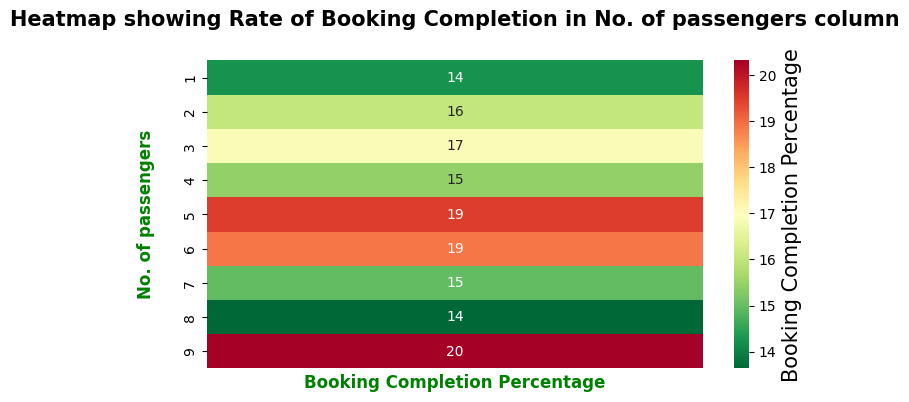

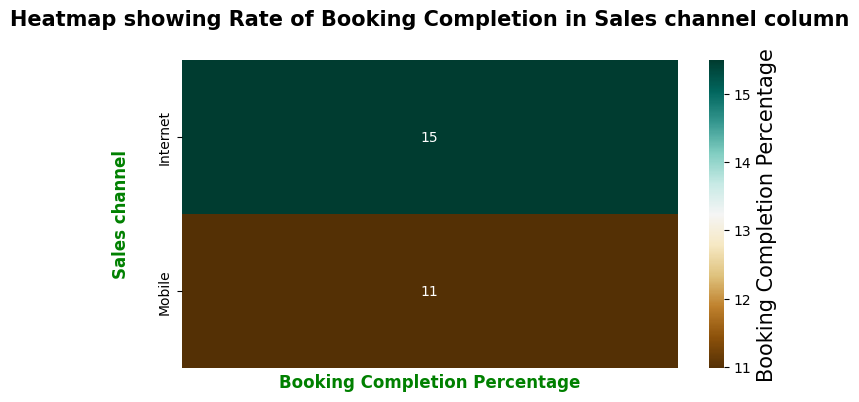

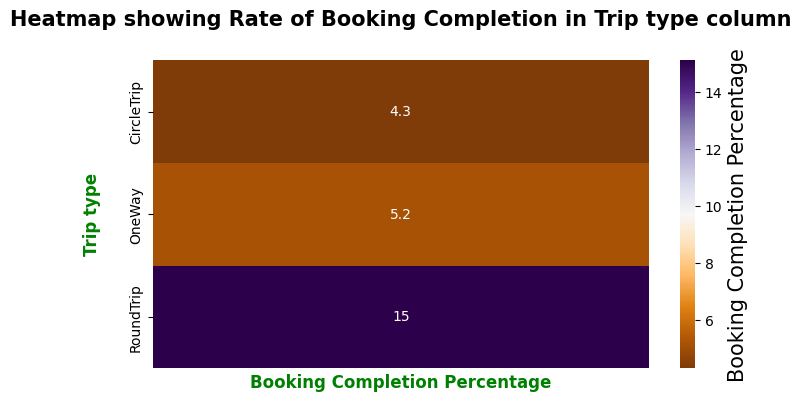

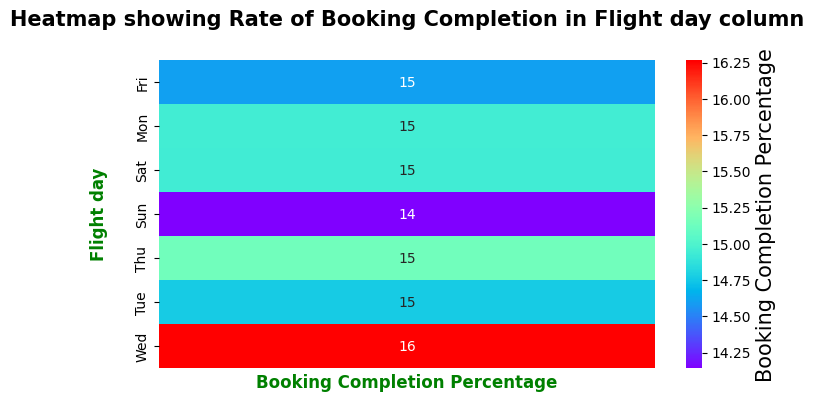

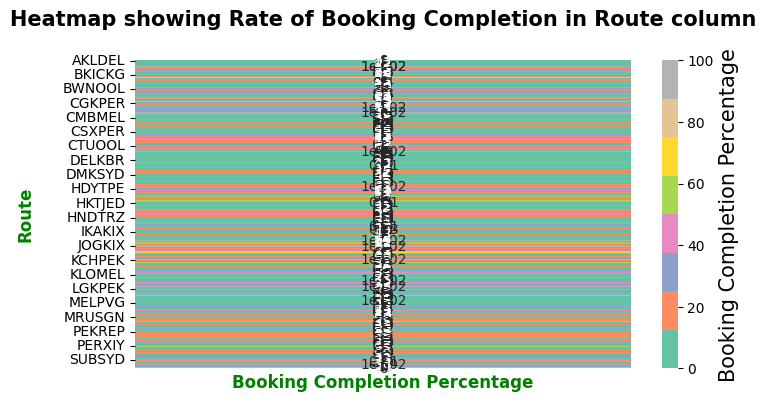

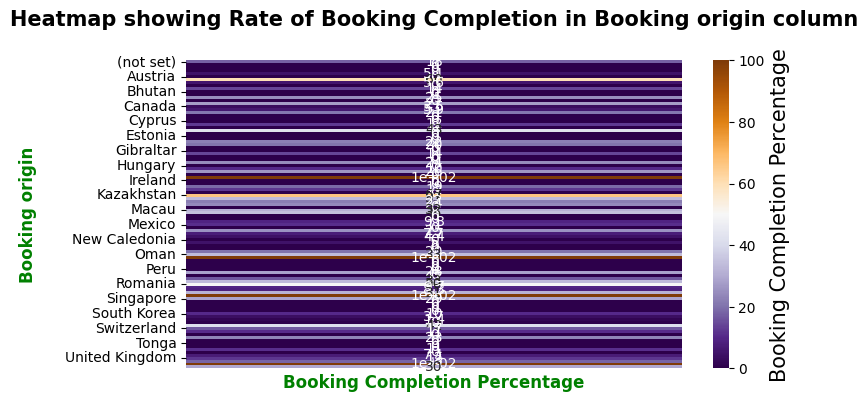

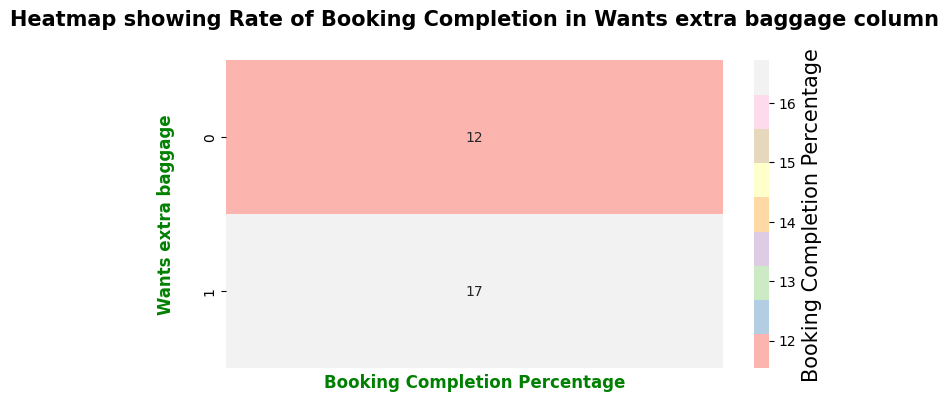

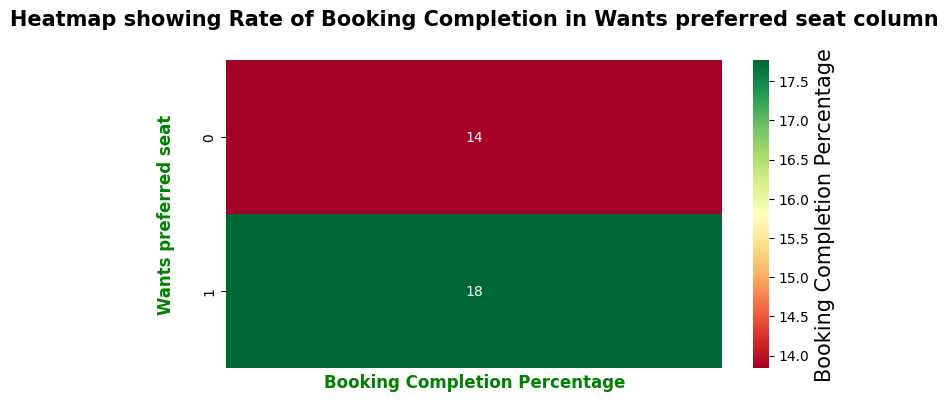

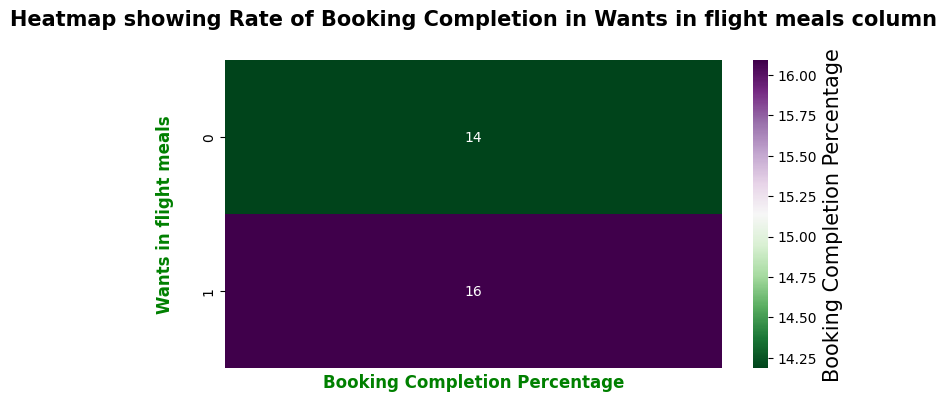

In [74]:
plots.categorical_Bi_variate_heatmap()

In [75]:
from numpy import random
target='booking_complete'

palette=['crest','cubehelix','flare','afmhot','gist_earth','gist_heat','gist_rainbow','CMRmap','cool','inferno',
                'viridis','rocket','magma','mako','icefire','seismic_r','crest','icefire','Set2','Set3','hsv']

colours=['Accent','Accent_r','BrBG','PRGn','PRGn_r','PiYG','PiYG_r','PuBuGn','rainbow','rocket','viridis','CMRmap',
              'PuBuGn_r','PuOr','PuOr_r','RdBu','RdBu_r','RdGy','RdGy_r', 'RdPu','RdPu_r','magma','mako','flare','icefire',
              'RdYlBu','RdYlBu_r','RdYlGn','RdYlGn_r','Spectral','Accent','Dark2','Paired','Pastel1','Pastel2','Set1','Set2','Set3']
for x in  cat_cols:
        num1=random.randint(len(palette))
        num2=random.randint(len(colours))
        seperate=[0.03 for j in range(len(data[x].unique()))]                                     # A list of numerical values to be used for exploding the pie chart

        table=pd.pivot_table(data=data,values=target,index=x).sort_values(by=target)
        table[target]=table[target]*100

        fig,axes=plt.subplots(1,2,figsize=(16,5))
        # sup_title=f"Percentage of Conversion in {col_names[x]} column"
        # plt.suptitle(sup_title,fontweight='bold',fontsize=20)
        fig.subplots_adjust(wspace=0.3)

        # Bar chart
        fig_Bar=sns.barplot(data=table,y=table.index,x=table['booking_complete'],ax=axes[0])
        fig_Bar.bar_label(axs.containers[0],fmt='%.2f%%',fontweight='bold',padding=0)                  # Setting bar labels with percentage of conversion
        axes[0].spines[['right','top','bottom']].set_visible(False)                                    # Removing the chart junk
        axes[0].xaxis.set_visible(False)                                                               # Hiding the x-axis
        # fig_Bar.set_ylabel(f"{col_names[x]}",fontweight='bold',fontsize=13)

        # Pie chart
        table.plot(kind='pie',subplots=True,ax=axes[1],cmap=colours[num2],explode=seperate)
        plt.ylabel("")

        # table.plot(kind='barh',ax=axes[0],legend=None,cmap=palette[num1])
        # table.plot(kind='pie',subplots=True,ax=axes[1],cmap=colours[num2],explode=seperate)

        # Setting the legend location
        plt.legend(loc='upper right',bbox_to_anchor=(1.7,0.9),title='Percentage')

Error in callback <function flush_figures at 0x7bc365ef12d0> (for post_execute):


KeyboardInterrupt: ignored

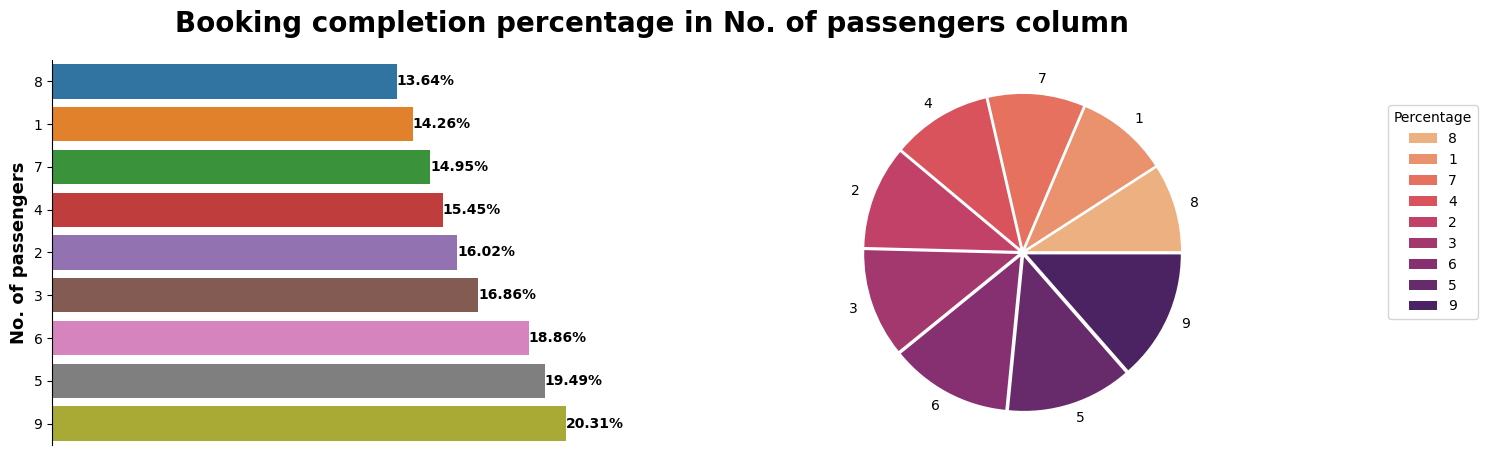

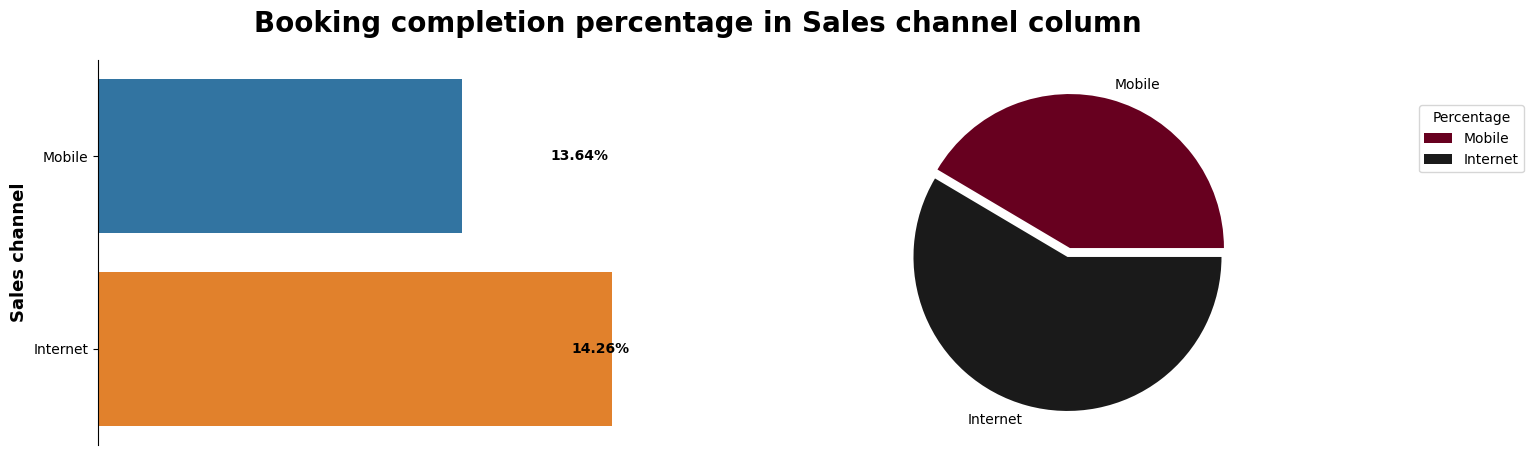

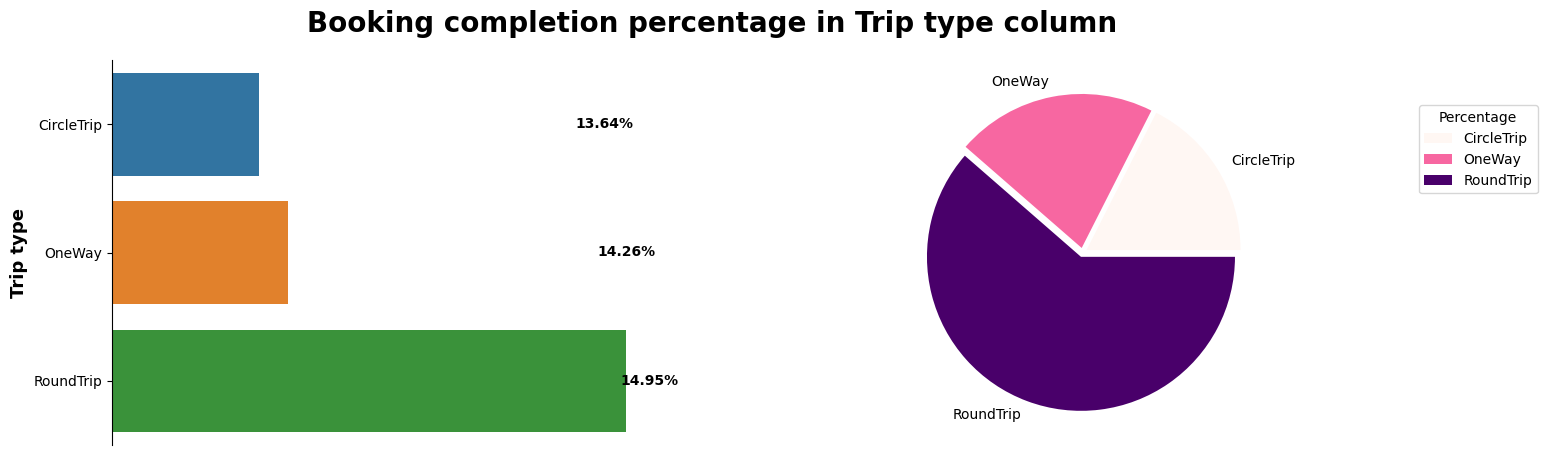

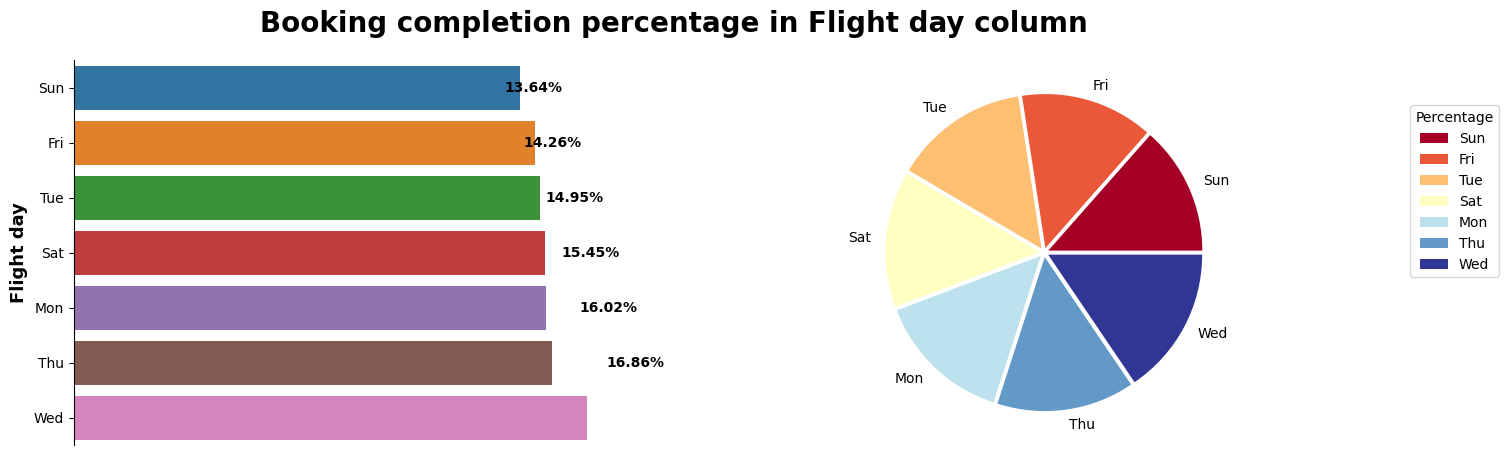

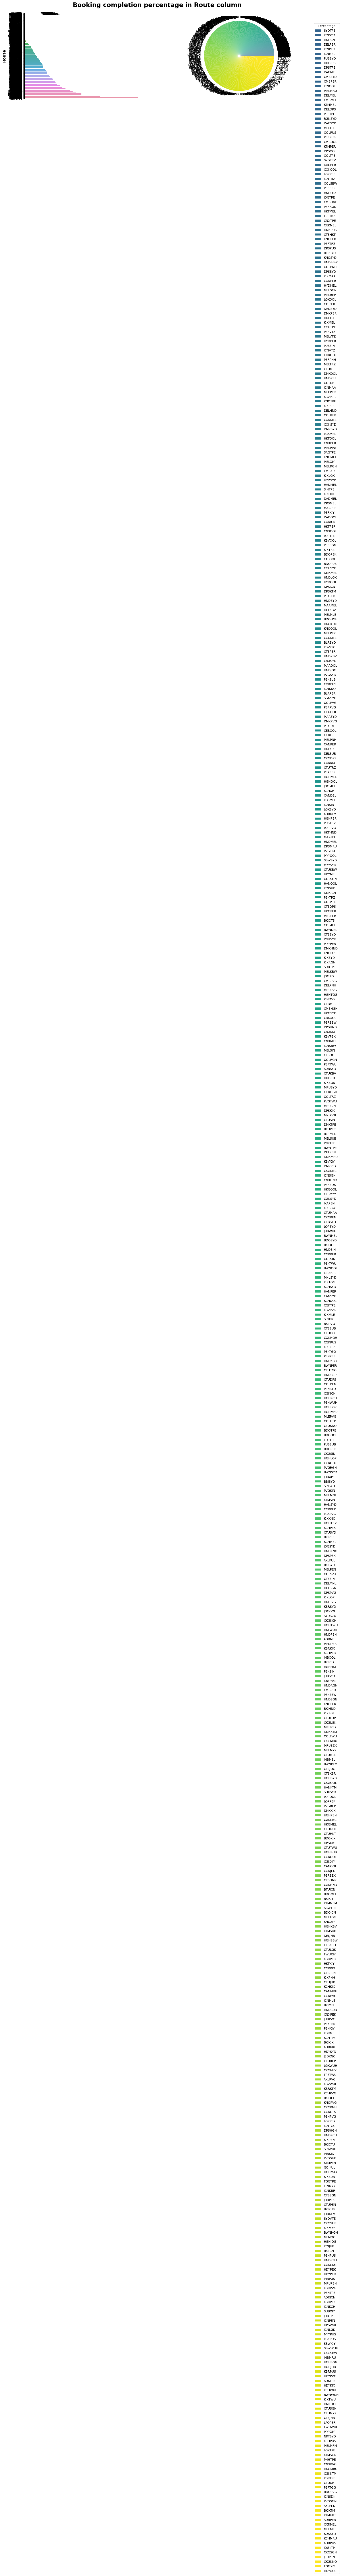

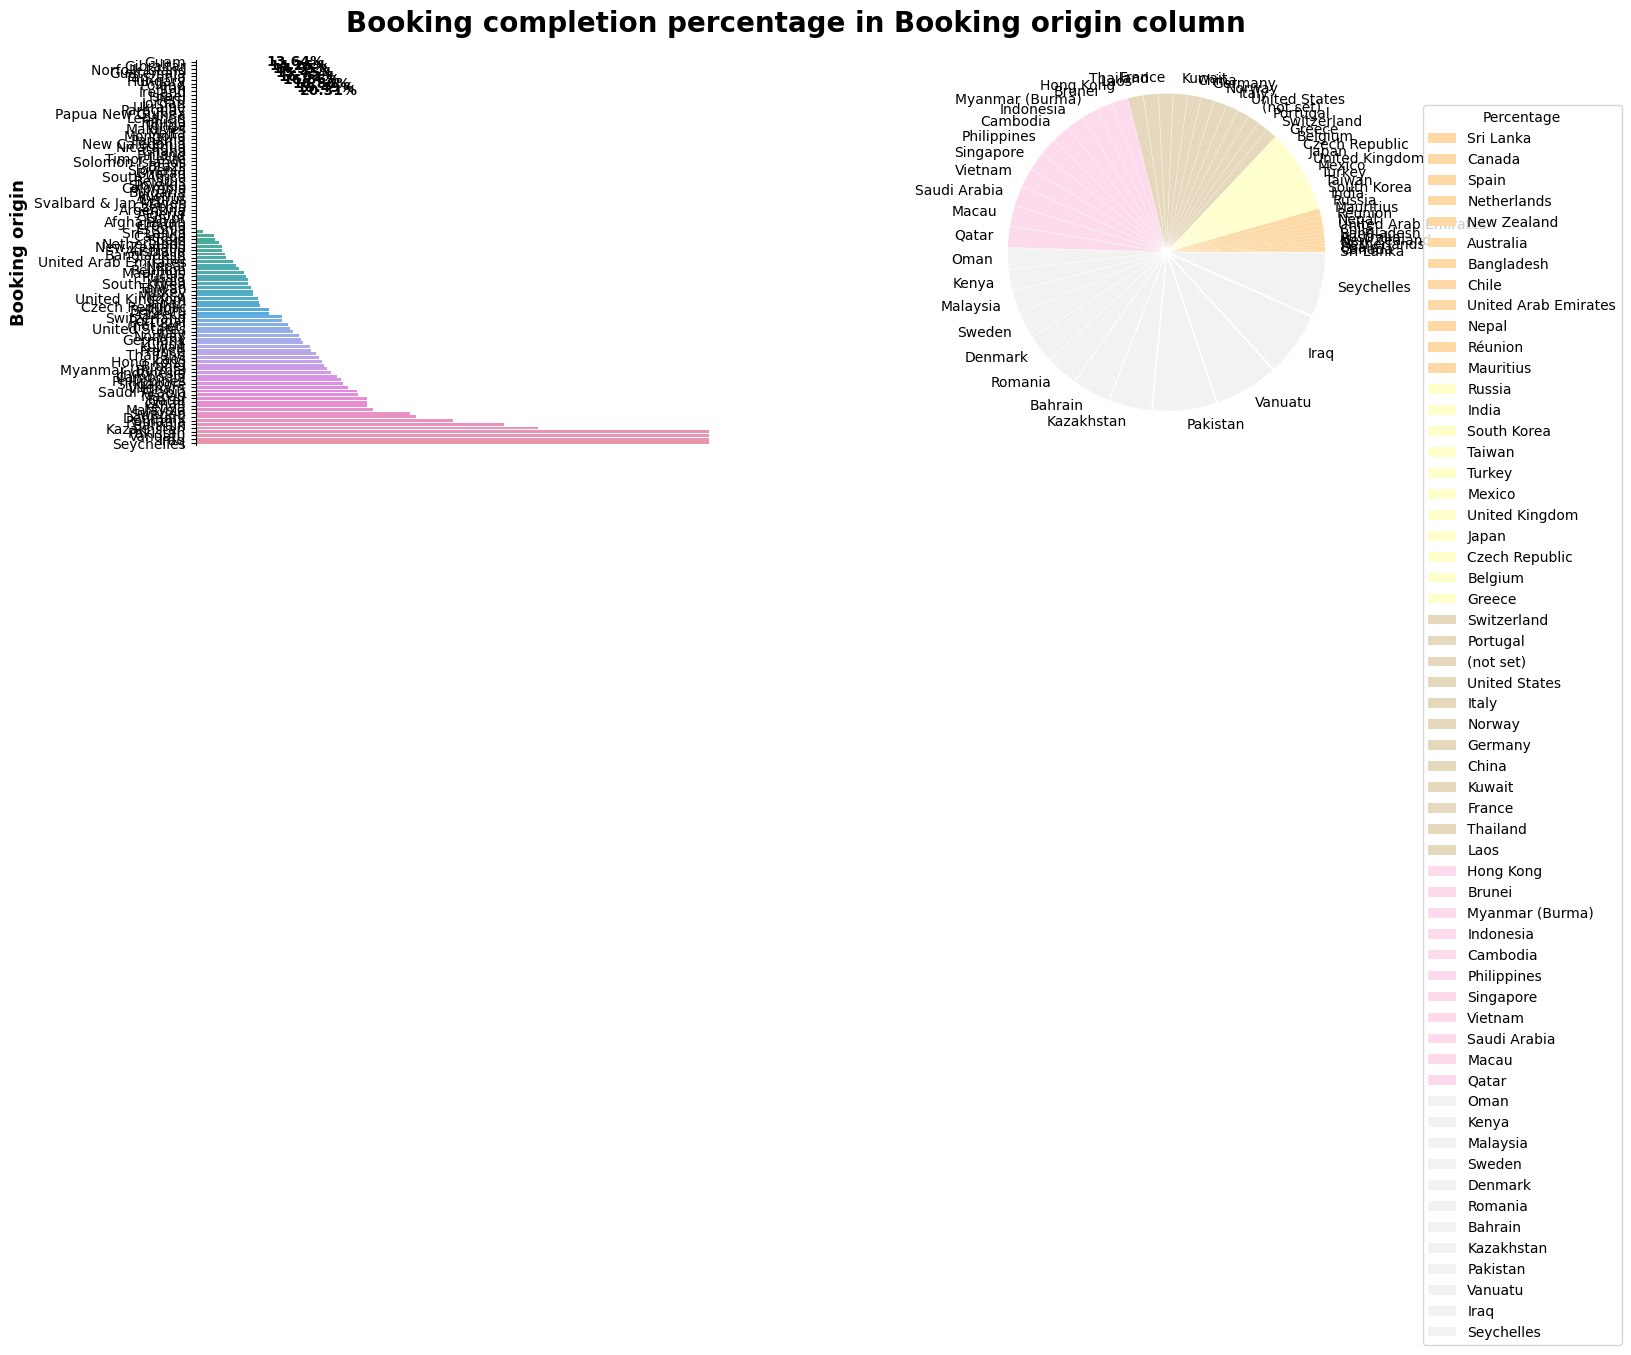

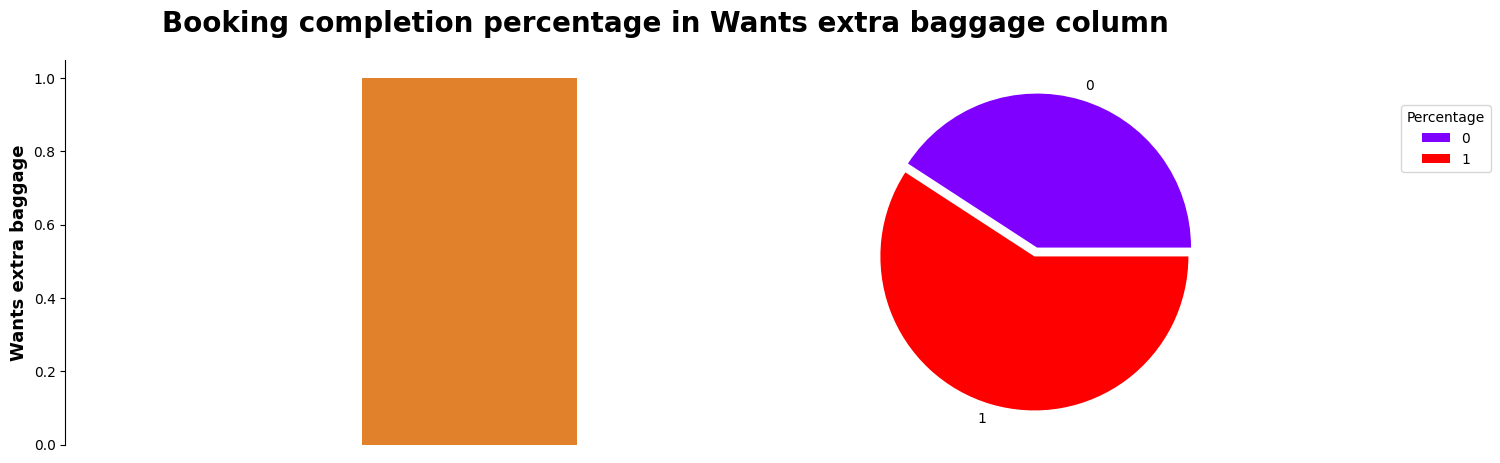

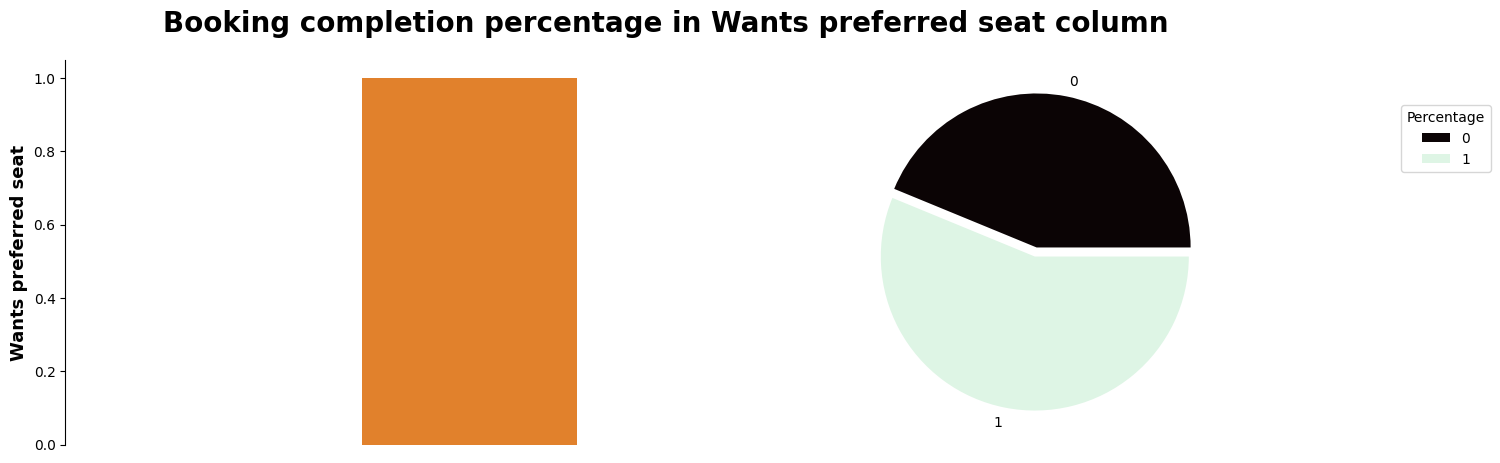

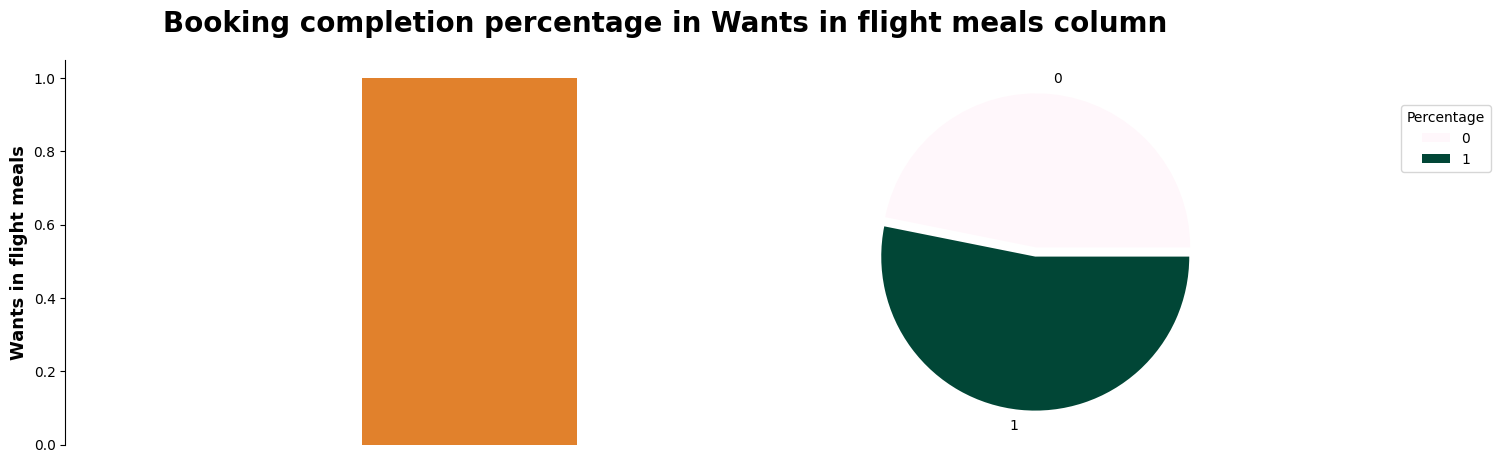

In [76]:
plots.categorical_Bi_variate_target()